<a href="https://colab.research.google.com/github/vbanai/ML-Technics-in-Sales-and-Marketing/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD DETECTION</br>
</br>
It is important that credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The task is to predict if the transaction is fraudulent or not.</br>
</br>
The dataset from Kaggle contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where there is 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. The reason why I was interested in this dataset is how to find a trade-off between recall and precision (it is better to use in case of inbalance dataset when positive class is underrepresented) or sensitivity(recall) and specificity, and how to balance this dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from urllib.request import urlopen
from zipfile import ZipFile

zipurl='https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/creditcard.zip'
zipresp=urlopen(zipurl)  
tempzip=open("/tmp/tempfile.zip", "wb")
tempzip.write(zipresp.read()) 
tempzip.close()
zf=ZipFile("/tmp/tempfile.zip")
zf.extractall(path="")
zf.close

df_initial=pd.read_csv('creditcard.csv')
df_initial.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This is a cleaned up, standardized dataset so no need for further data exploration.

In [2]:
#drop duplicates
df_initial.drop_duplicates(inplace = True)

In [ ]:
df_initial.shape

(283726, 31)

In [ ]:
#we have an inbalanced dataset
df_initial.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
len(df_initial.columns.to_list())

31

Check the distribution of the variables

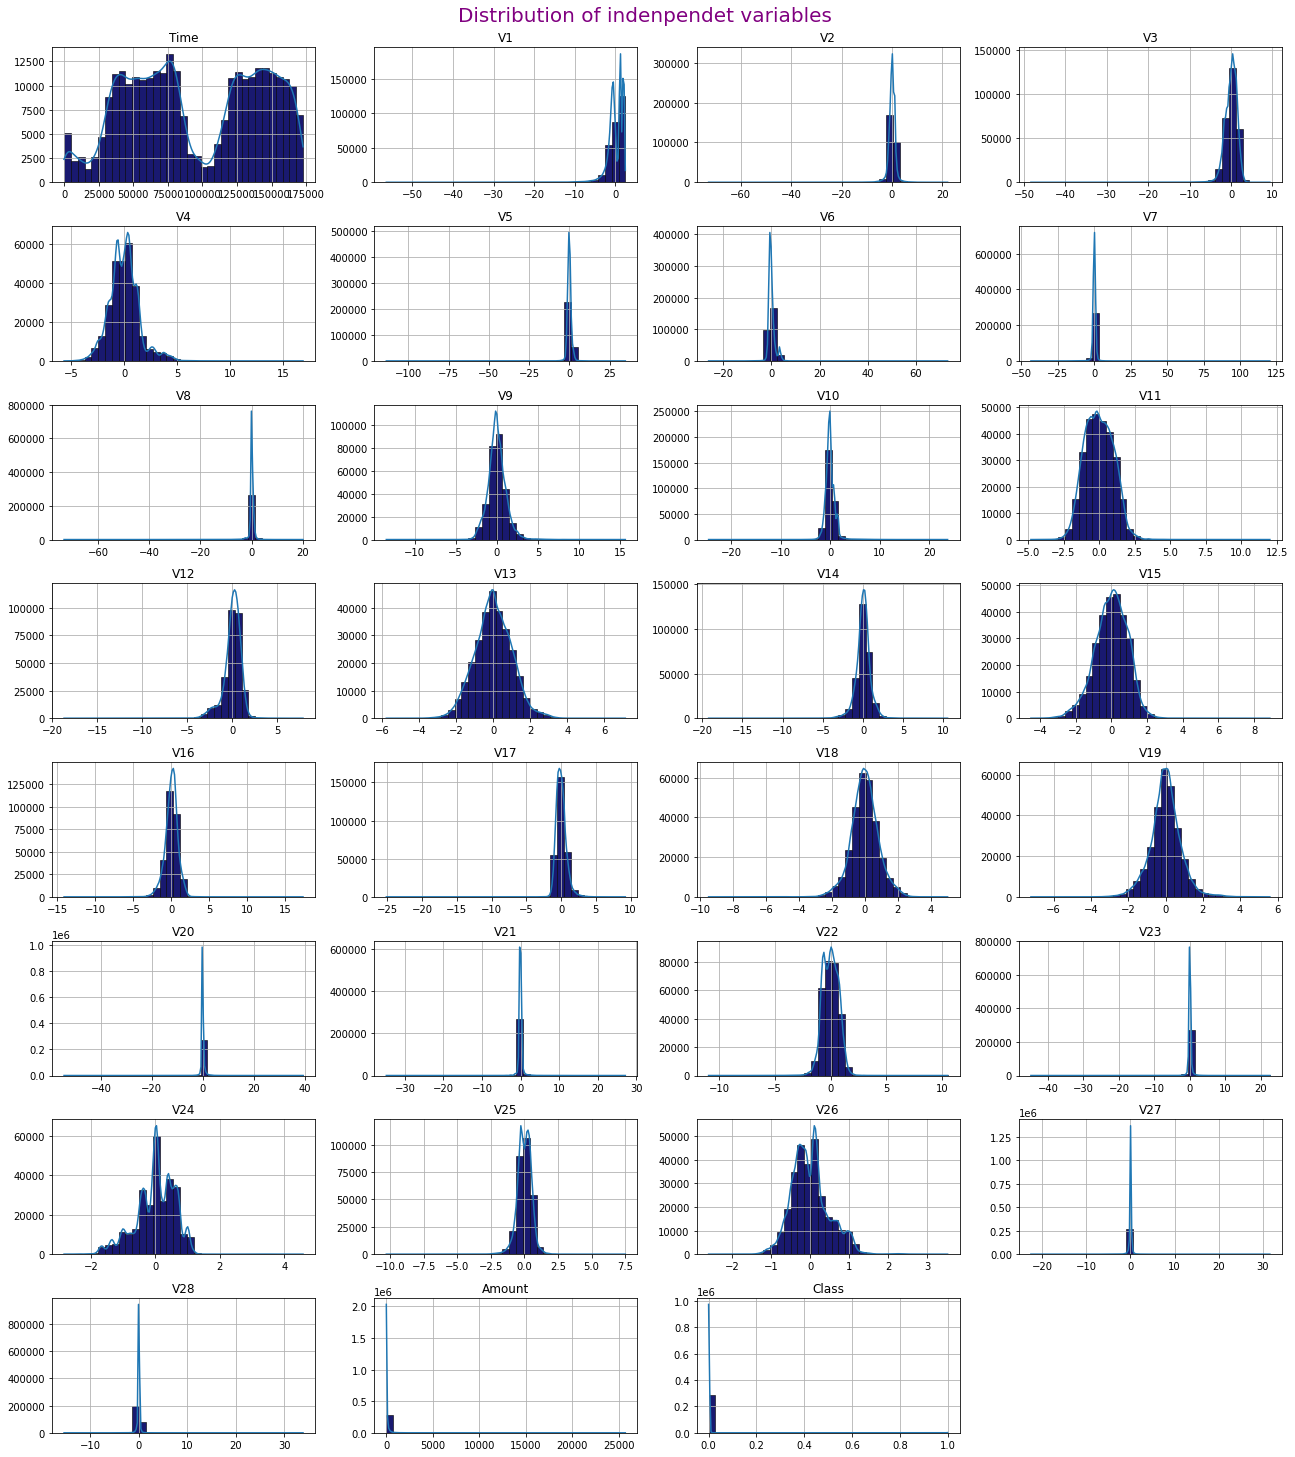

In [ ]:
plt.rcParams.update({'figure.figsize': (18,20)})
plt.suptitle('Distribution of indenpendet variables', y=1.01, fontsize=20, color='purple')
t=df_initial.columns.to_list()
for i in range(len(t)):
    plt.subplot(8, 4, i+1)
    sns.histplot(df_initial[t[i]], bins=35, kde=True, facecolor="midnightblue")
    plt.ylabel(None)
    plt.xlabel(None)
    plt.title(t[i])
    plt.grid()
    
plt.tight_layout()



Check how much extent the dataset is inbalanced

Text(0.5, 1.0, 'Class values count')

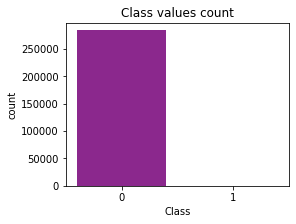

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=df_initial, x='Class', palette="plasma")
plt.title('Class values count')

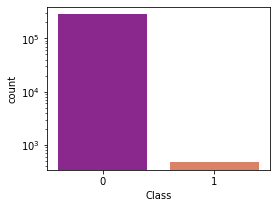

In [ ]:
# use logplot to see the data better visually
plt.figure(figsize=(4,3))
ax=sns.countplot(x="Class", data=df_initial, palette="plasma")
ax.set_yscale("log")

Checking the correlation matrix

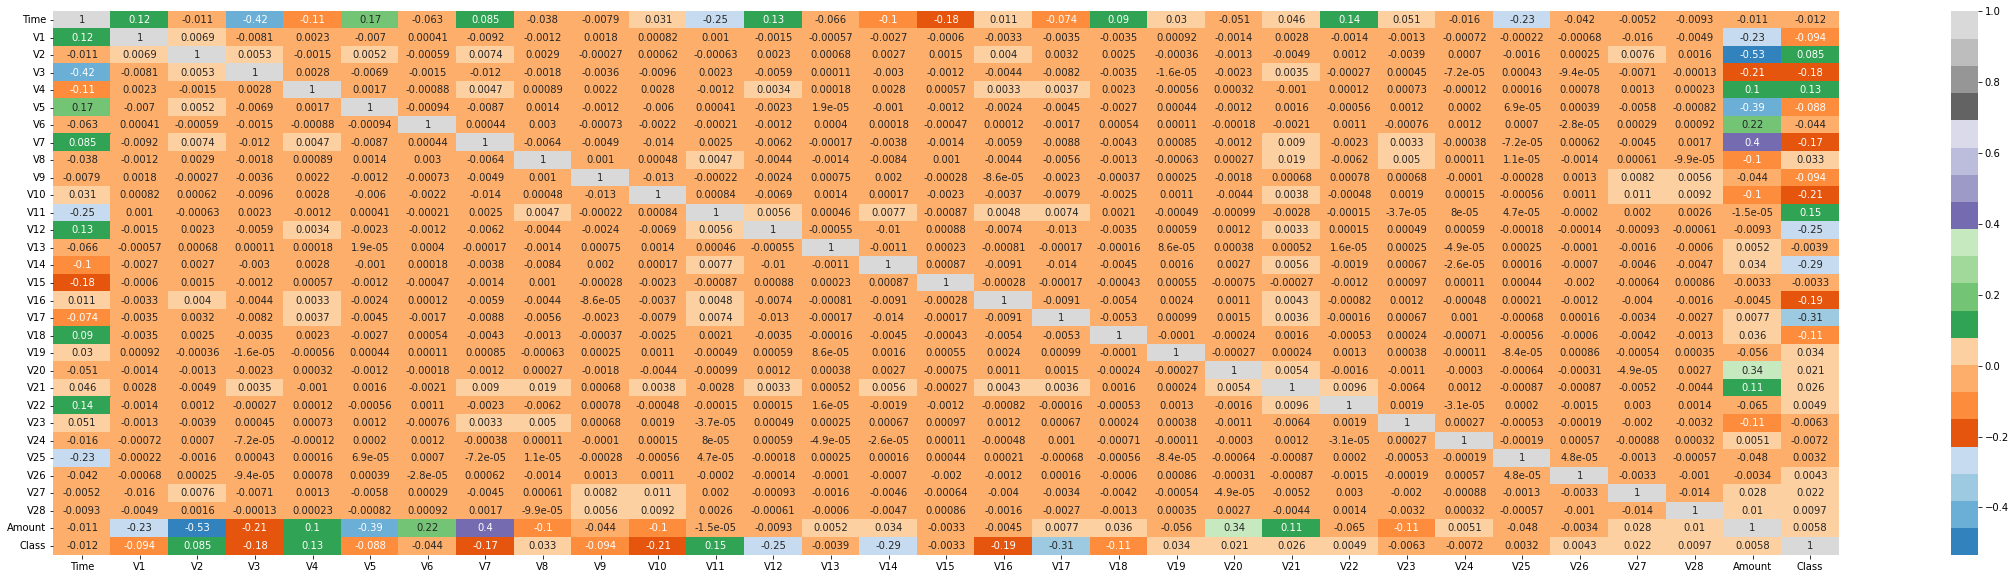

In [ ]:
plt.figure(figsize=(40,10))
sns.heatmap(df_initial.corr(), annot=True, cmap="tab20c")

Creating independent variables and dependent variable

In [3]:
independent_variables=df_initial.columns[:-1].to_list()
X1=df_initial[independent_variables]
y=df_initial['Class']


Using statsmodel to check which independent variable has significant predictive power (checking if "p"value is smaller than 0.05)

In [4]:
X=sm.add_constant(X1)
log_reg=sm.Logit(y, X)
result_logit=log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13


In [5]:
result_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283695
Method:                           MLE   Df Model:                           30
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                  0.6819
Time:                        12:09:45   Log-Likelihood:                -1112.8
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3983      0.250    -33.602      0.000      -8.888      -7.908
Time       -3.676e-06   2.26e-06     -1.627      0.104    -8.1e-06    7.51e-07
V1             0.0961      0.042      2.270      0.023       0.013       0.179
V2             0.0106      0.058      0.182      0.855      -0.103       0.125
V3            -0.0083      0.053     -0.157      0.875      -0.112       0.096
V4             0.7013      0.074      9.484      0.000       0.556       0.846
V5             0.1305      0.067      1.952      0.051      -0.001       0.262
V6            -0.1240      0.074     -1.671      0.095      -0.269       0.021
V7            -0.0948      0.067     -1.421      0.155      -0.226       0.036
V8            -0.1766      0.031     -5.769      0.000      -0.237      -0.117
V9            -0.2825      0.111     -2.551      0.011      -0.500      -0.065
V10           -0.8230      0.097     -8.497      0.000      -1.013      -0.633
V11           -0.0579      0.081     -0.711      0.477      -0.217       0.102
V12            0.0831      0.087      0.955      0.339      -0.087       0.254
V13           -0.3257      0.082     -3.986      0.000      -0.486      -0.166
V14           -0.5477      0.062     -8.785      0.000      -0.670      -0.426
V15           -0.1207      0.086     -1.403      0.161      -0.289       0.048
V16           -0.1992      0.125     -1.592      0.111      -0.444       0.046
V17           -0.0139      0.070     -0.198      0.843      -0.151       0.124
V18           -0.0139      0.129     -0.107      0.914      -0.267       0.239
V19            0.0985      0.097      1.015      0.310      -0.092       0.289
V20           -0.4616      0.082     -5.660      0.000      -0.621      -0.302
V21            0.3944      0.060      6.564      0.000       0.277       0.512
V22            0.6377      0.134      4.750      0.000       0.375       0.901
V23           -0.1021      0.059     -1.733      0.083      -0.217       0.013
V24            0.1191      0.148      0.807      0.420      -0.170       0.409
V25           -0.0506      0.133     -0.379      0.704      -0.312       0.211
V26            0.0094      0.190      0.050      0.960      -0.363       0.382
V27           -0.8265      0.122     -6.778      0.000      -1.065      -0.587
V28           -0.2973      0.088     -3.378      0.001      -0.470      -0.125
Amount         0.0009      0.000      2.454      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Remove independent variables which has "p" value higher than 0.05

In [6]:
for i in range(len(independent_variables)):
  X=sm.add_constant(df_initial[independent_variables])
  model=sm.Logit(df_initial.Class, X)
  result=model.fit(disp=0)
  largest_pvalue=round(result.pvalues,3).nlargest(1) 
  if largest_pvalue[0]>(0.05):
    independent_variables.remove(largest_pvalue.index[0])
   

Check which variable remained in the dataset

In [8]:
X1=df_initial[independent_variables]

X=sm.add_constant(X1)
log_reg=sm.Logit(y, X)
result_logit=log_reg.fit()

result_logit.summary()

Optimization terminated successfully.
         Current function value: 0.003941
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283708
Method:                           MLE   Df Model:                           17
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                  0.6804
Time:                        12:15:00   Log-Likelihood:                -1118.1
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6536      0.133    -65.304      0.000      -8.913      -8.394
V1             0.0787      0.036      2.214      0.027       0.009       0.148
V4             0.6836      0.061     11.196      0.000       0.564       0.803
V5             0.1430      0.031      4.568      0.000       0.082       0.204
V7            -0.1157      0.055     -2.096      0.036      -0.224      -0.008
V8            -0.1501      0.023     -6.655      0.000      -0.194      -0.106
V9            -0.2246      0.083     -2.709      0.007      -0.387      -0.062
V10           -0.7869      0.087     -9.085      0.000      -0.957      -0.617
V13           -0.3000      0.079     -3.812      0.000      -0.454      -0.146
V14           -0.5076      0.051     -9.907      0.000      -0.608      -0.407
V16           -0.2359      0.060     -3.917      0.000      -0.354      -0.118
V20           -0.4152      0.075     -5.499      0.000      -0.563      -0.267
V21            0.3675      0.054      6.856      0.000       0.262       0.473
V22            0.5721      0.123      4.640      0.000       0.330       0.814
V23           -0.1079      0.051     -2.101      0.036      -0.209      -0.007
V27           -0.7545      0.122     -6.176      0.000      -0.994      -0.515
V28           -0.2815      0.091     -3.109      0.002      -0.459      -0.104
Amount         0.0008      0.000      2.642      0.008       0.000       0.001
==============================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Creating new dataframe with the diminished independent features

In [9]:
X=df_initial[independent_variables]


1.) Making train-test split and let's predict with LOGISTIC REGRESSION model

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.20, random_state=5)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score


In [12]:
print("Accuracy with Sklearn Logistic Regression: {:.2%}".format(accuracy_score(y_test, y_pred)))

Accuracy with Sklearn Logistic Regression: 99.94%


Creating the confusion matrix where we can check the True Positive, True Negative, False Positive, False Negative scores. Here in case of fraud detection task the most important is to have low score in the False Negative section of the matrix.

<module 'seaborn' from '/usr/local/lib/python3.9/dist-packages/seaborn/__init__.py'>

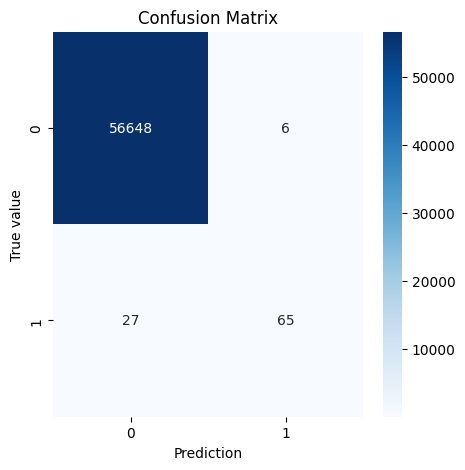

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, y_pred))

For fun creating the matrix with a little bit different layout

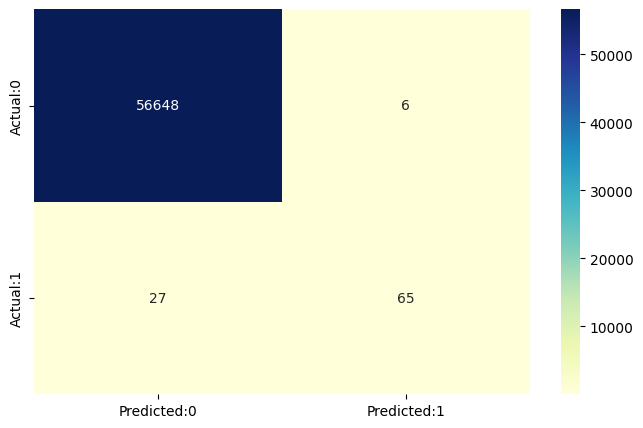

In [14]:
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu');

Let's see the Sensitivity and Specificity rate balance (Now I calculate Specificity instead of Precision as I will make a ROC curve as well)

In [29]:
cm=confusion_matrix(y_test, y_pred)

TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Specificity=TN/(TN+FP)   # Specificity
Sensitivity=TP/(TP+FN)   # or Recall
#This model is more specific then Sensitive, which means that more accurately predict negative values
print('Specificity: {:.2%}'.format(Specificity))
print('Recall (Sensitivity): {:.2%}'.format(Recall))
print(TP, TN, FP, FN)

Specificity: 99.99%
Recall (Sensitivity): 70.65%
65 56648 6 27


As we have the task to predict the fraudulent transactions as precise as possible, we have to give up some precision percent to increase the recall result. Let's find the optimal threshold that produce better precision/recall trade-off. 

In [30]:
from sklearn.preprocessing import Binarizer


for i in range(0,11):
  y_pred_prob_yes=logreg.predict_proba(X_test)
  binarize=Binarizer(threshold=i/10)
  y_pred2=binarize.fit_transform(y_pred_prob_yes)[:,1]
  #y_pred2=binarize(y_pred_prob_yes, i/10)[:,1]
  cm2=confusion_matrix(y_test, y_pred2)
  print('With', i/10, 'threshold the Confusion Matrix is ', '\n', cm2, '\n', 
        'with', cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0], 'Type II errors( False Negatives)','\n\n',
        'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 'Specificity: ', cm2[1,1]/(float(cm2[1,1]+cm2[0,1])), '\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[    0 56654]
 [    0    92]] 
 with 92 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0016212596482571458 



With 0.1 threshold the Confusion Matrix is  
 [[56637    17]
 [   17    75]] 
 with 56712 correct predictions and 17 Type II errors( False Negatives) 

 Sensitivity:  0.8152173913043478 Specificity:  0.8152173913043478 



With 0.2 threshold the Confusion Matrix is  
 [[56640    14]
 [   22    70]] 
 with 56710 correct predictions and 22 Type II errors( False Negatives) 

 Sensitivity:  0.7608695652173914 Specificity:  0.8333333333333334 



With 0.3 threshold the Confusion Matrix is  
 [[56641    13]
 [   25    67]] 
 with 56708 correct predictions and 25 Type II errors( False Negatives) 

 Sensitivity:  0.7282608695652174 Specificity:  0.8375 



With 0.4 threshold the Confusion Matrix is  
 [[56646     8]
 [   27    65]] 
 with 56711 correct predictions and 27 Type II errors( Fal

Let's use the optimal 0.1 threshold value

<module 'seaborn' from '/usr/local/lib/python3.9/dist-packages/seaborn/__init__.py'>

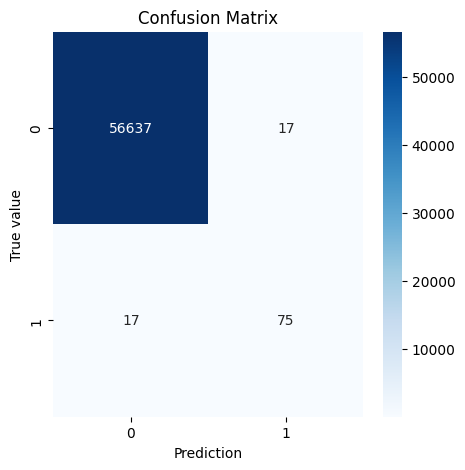

In [33]:
y_pred_prob_yes=logreg.predict_proba(X_test)
binarize=Binarizer(threshold=0.1)
y_pred2=binarize.fit_transform(y_pred_prob_yes, 0.1)[:,1]
#cm2=confusion_matrix(y_test, y_pred2)

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, y_pred2))

In [34]:
cm2=confusion_matrix(y_test, y_pred2)

TP=cm2[1,1]
TN=cm2[0,0]
FP=cm2[0,1]
FN=cm2[1,0]
Specificity=TP/(TP+FP)  
Sensitivity=TP/(TP+FN)  
print('Specificity: {:.2%}'.format(Specificity))
print('Sensitivity: {:.2%}'.format(Sensitivity))
print(TP, TN, FP, FN)

Specificity: 81.52%
Sensitivity: 81.52%
75 56637 17 17


Now with changing the threshold from 0.5 to 0.1 the trade-off got better.
Originally we had precision: 89.86% and recall: 67.39% but now we reached precision: 81.52% and recall: 81.52%. The most important value, False Negative score has decreased from 30 to 17.

Let's plot the ROC (Receiver Operating Characteristic) curve</br>
The ROC curve shows the trade-off between sensitivity  and specificity. Classifiers that give curves closer to the top-left corner indicate a better performance.

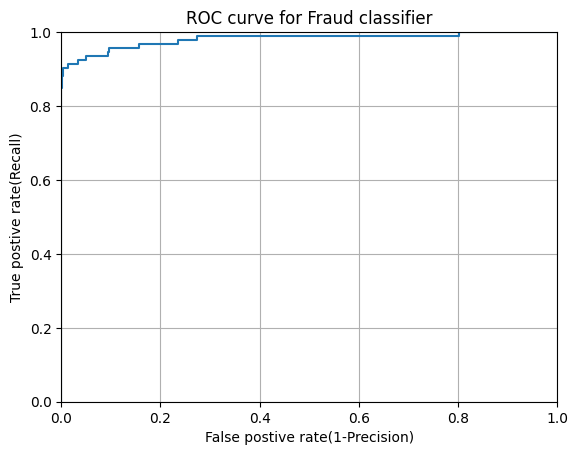

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False postive rate(1-Precision)')
plt.ylabel('True postive rate(Recall)')
plt.grid(True)

Checking AUC (Area under the curve) which quantify the model's accuracy, the closer AUC is to 1 , the better the model is

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob_yes[:,1])

0.9807569518096884

2.) Let's predict with the Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.20, random_state=5)

from sklearn.ensemble import RandomForestClassifier
RandF=RandomForestClassifier()
RandF.fit(X_train, y_train)
y_pred=RandF.predict(X_test)

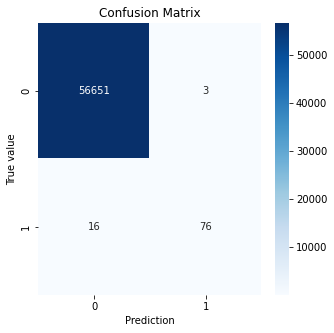

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

In [ ]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision: {:.2%}'.format(Precision))
print('Recall: {:.2%}'.format(Recall))

Precision: 95.00%
Recall: 82.61%


In [ ]:
y_pred_prob_yes=RandF.predict_proba(X_test)
y_pred_prob_yes=pd.DataFrame(data=y_pred_prob_yes, columns=["Not Fraud(0)", "Fraud(1)"])
y_pred_prob_yes.head()

,Not Fraud(0),Fraud(1)
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


Let's improve the Precision/Recall trade-off by finding the optimal threshold

In [ ]:
from sklearn.preprocessing import binarize

for i in range(0,11):
  y_pred_prob_yes=RandF.predict_proba(X_test)
  y_pred2=binarize(y_pred_prob_yes, i/10)[:,1]
  cm2=confusion_matrix(y_test, y_pred2)
  print('With', i/10, 'threshold the Confusion Matrix is ', '\n', cm2, '\n', 
        'with', cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0], 'Type II errors( False Negatives)','\n\n',
        'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 'Specificity: ', cm2[1,1]/(float(cm2[1,1]+cm2[0,1])), '\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[55423  1231]
 [    8    84]] 
 with 55507 correct predictions and 8 Type II errors( False Negatives) 

 Sensitivity:  0.9130434782608695 Specificity:  0.06387832699619772 



With 0.1 threshold the Confusion Matrix is  
 [[56633    21]
 [   11    81]] 
 with 56714 correct predictions and 11 Type II errors( False Negatives) 

 Sensitivity:  0.8804347826086957 Specificity:  0.7941176470588235 



With 0.2 threshold the Confusion Matrix is  
 [[56647     7]
 [   11    81]] 
 with 56728 correct predictions and 11 Type II errors( False Negatives) 

 Sensitivity:  0.8804347826086957 Specificity:  0.9204545454545454 



With 0.3 threshold the Confusion Matrix is  
 [[56648     6]
 [   11    81]] 
 with 56729 correct predictions and 11 Type II errors( False Negatives) 

 Sensitivity:  0.8804347826086957 Specificity:  0.9310344827586207 



With 0.4 threshold the Confusion Matrix is  
 [[56650     4]
 [   13    79]] 
 with 56729 correct prediction

Check the correlation matrix with the optimal threshold (0.4)

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

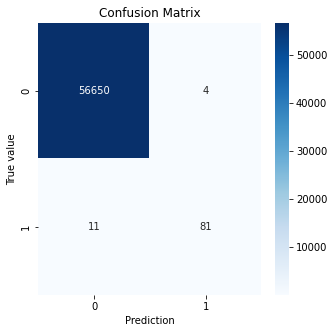

In [ ]:
y_pred_prob_yes=RandF.predict_proba(X_test)
y_pred2=binarize(y_pred_prob_yes, 0.4)[:,1]
#cm2=confusion_matrix(y_test, y_pred2)

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, y_pred2))

In [ ]:
cm=confusion_matrix(y_test, y_pred2)

TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision: {:.2%}'.format(Precision))
print('Recall: {:.2%}'.format(Recall))

Precision: 95.18%
Recall: 85.87%


We could imporve our model by the optimal threshold. The original precision with threshold 0.5 was 95.00% and the recall was 82.61%. Now with the optimal threshold the Precision is 95.18%, the
Recall is 85.87%. The false negative value decreased from 16 to 13.

ROC curve

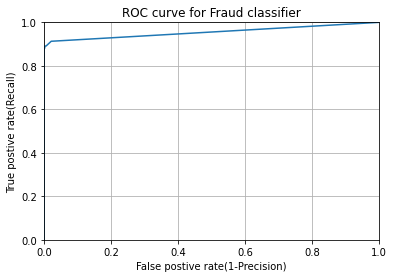

In [ ]:


from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False postive rate(1-Precision)')
plt.ylabel('True postive rate(Recall)')
plt.grid(True)

AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

#auc Area under the curve this quantify the model's accuracy, the closer auc to 1 the better the model is

roc_auc_score(y_test, y_pred_prob_yes[:,1])

0.9552117276342589

Predict with XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.20, random_state=5)

from sklearn.ensemble import RandomForestClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)



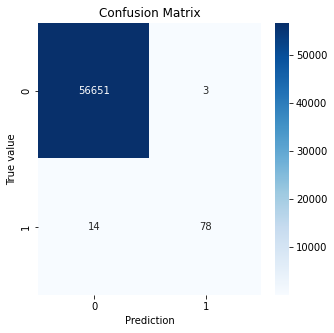

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, xgb_yhat))
cm=confusion_matrix(y_test, xgb_yhat)

In [ ]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision: {:.2%}'.format(Precision))
print('Recall: {:.2%}'.format(Recall))

Precision: 96.30%
Recall: 84.78%


In [ ]:
#accuracy (it is not relevant in this case)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9997004194128221

In [ ]:
#Cross val accuracy just for fun

from sklearn.model_selection import cross_val_score
import numpy as np
print(np.mean(cross_val_score(xgb, X_train, y_train, cv=10)))

0.9995153758040356


Find the optimal threshold

In [ ]:
from sklearn.preprocessing import binarize

for i in range(0,11):
  y_pred_prob_yes=xgb.predict_proba(X_test)
  y_pred2=binarize(y_pred_prob_yes, i/10)[:,1]
  cm2=confusion_matrix(y_test, y_pred2)
  print('With', i/10, 'threshold the Confusion Matrix is ', '\n', cm2, '\n', 
        'with', cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0], 'Type II errors( False Negatives)','\n\n',
        'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 'Specificity: ', cm2[1,1]/(float(cm2[1,1]+cm2[0,1])), '\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[    0 56654]
 [    0    92]] 
 with 92 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0016212596482571458 



With 0.1 threshold the Confusion Matrix is  
 [[56642    12]
 [   12    80]] 
 with 56722 correct predictions and 12 Type II errors( False Negatives) 

 Sensitivity:  0.8695652173913043 Specificity:  0.8695652173913043 



With 0.2 threshold the Confusion Matrix is  
 [[56648     6]
 [   12    80]] 
 with 56728 correct predictions and 12 Type II errors( False Negatives) 

 Sensitivity:  0.8695652173913043 Specificity:  0.9302325581395349 



With 0.3 threshold the Confusion Matrix is  
 [[56648     6]
 [   13    79]] 
 with 56727 correct predictions and 13 Type II errors( False Negatives) 

 Sensitivity:  0.8586956521739131 Specificity:  0.9294117647058824 



With 0.4 threshold the Confusion Matrix is  
 [[56651     3]
 [   13    79]] 
 with 56730 correct predictions and 13 Type II

Confusion matrix with optimal threshold (0.2) with XGBoost model

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

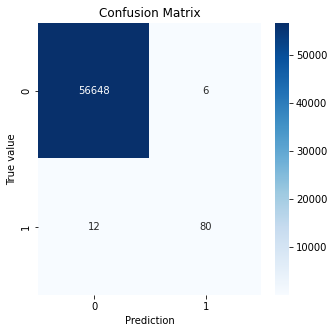

In [ ]:
y_pred_prob_yes=xgb.predict_proba(X_test)
y_pred2=binarize(y_pred_prob_yes, 0.2)[:,1]
#cm2=confusion_matrix(y_test, y_pred2)

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, y_pred2))

In [ ]:
cm=confusion_matrix(y_test, y_pred2)

TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision: {:.2%}'.format(Precision))
print('Recall: {:.2%}'.format(Recall))

Precision: 93.02%
Recall: 86.96%


Precision/Recall trade off with the optimal 0.2 threshold value: <br>
Precision: 93.02%<br>
Recall: 86.96%<br>
Original Precision/Recall values with threshold 0.5:<br>
Precision: 96.30%<br>
Recall: 84.78%<br>
False Negative score decreased from 14 to 12

ROC Curve

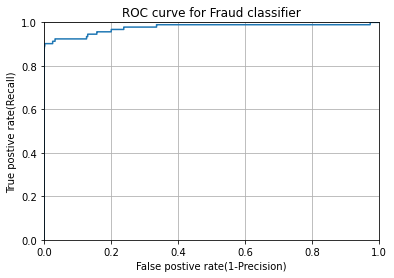

In [ ]:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False postive rate(1-Precision)')
plt.ylabel('True postive rate(Recall)')
plt.grid(True)

AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

#auc Area under the curve this quantify the model's accuracy, the closer auc to 1 the better the model is

roc_auc_score(y_test, y_pred_prob_yes[:,1])

0.9758047898686304

In [ ]:
y_pd=pd.DataFrame(y)


XGBOOST with 0.2 threshold and cross validation

Precision: 70.80%
Recall: 86.02%
Precision: 92.06%
Recall: 90.62%
Precision: 90.24%
Recall: 78.72%
Precision: 95.24%
Recall: 62.50%
Precision: 87.50%
Recall: 77.78%
Precision: 88.89%
Recall: 81.01%
Precision: 89.47%
Recall: 70.83%
Precision: 92.86%
Recall: 78.79%
Precision: 92.68%
Recall: 73.08%
Precision: 88.24%
Recall: 68.18%


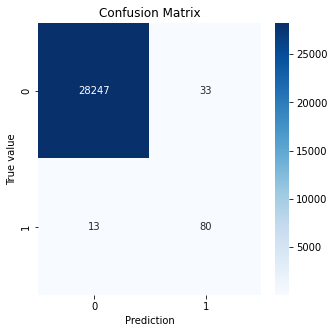

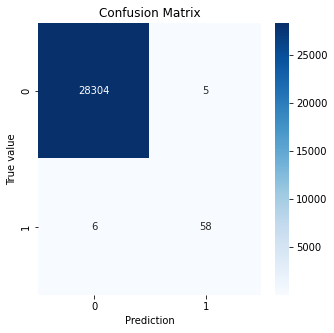

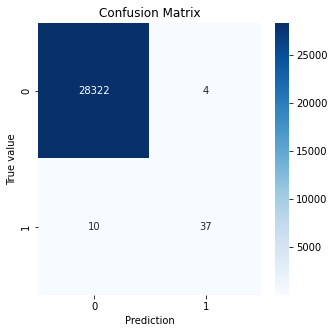

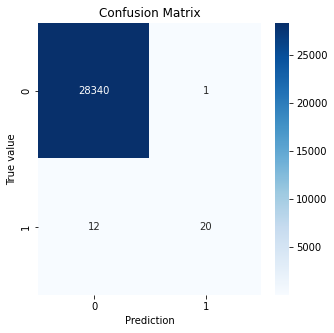

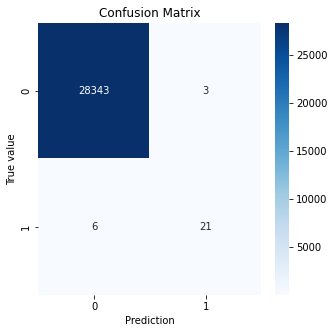

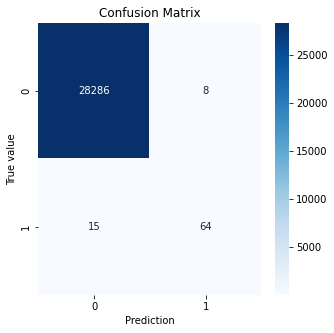

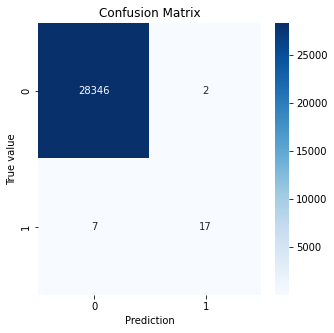

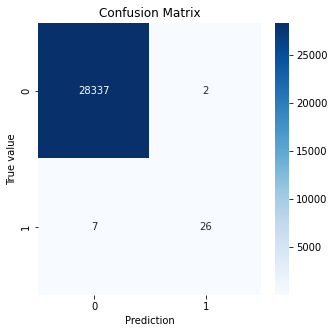

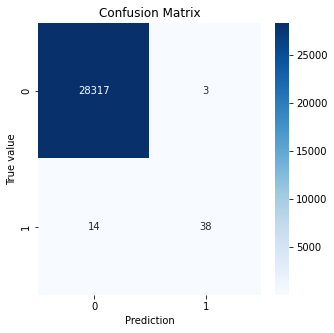

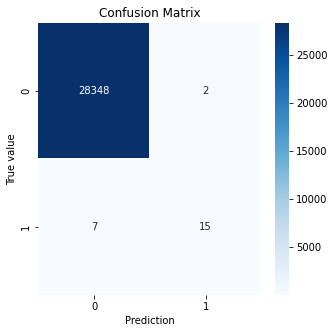

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

kf=KFold(n_splits=10)
scores_l=[]
for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test=X.iloc[train_index], X.iloc[test_index], y_pd.iloc[train_index], y_pd.iloc[test_index]
  xgb.fit(X_train, y_train)
  y_pred_prob_yes=xgb.predict_proba(X_test)
  y_pred2=binarize(y_pred_prob_yes, 0.2)[:,1]
  #cm2=confusion_matrix(y_test, y_pred2)


  plt.figure(figsize = (5,5))
  sn.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")

  cm=confusion_matrix(y_test, y_pred2)

  TP=cm[1,1]
  TN=cm[0,0]
  FP=cm[0,1]
  FN=cm[1,0]
  Precision=TP/(TP+FP)   # Specificity
  Recall=TP/(TP+FN)   # or Sensitivity
  #This model is more specific then Sensitive
  print('Precision: {:.2%}'.format(Precision))
  print('Recall: {:.2%}'.format(Recall))


Average scores: XGBoost with 0.2 threshold with 10 k-fold cross validation:</br>Precision: 79.53.06%</br>
Recall: 76.75%</br>
False Negative Score: 9.7

SMOTE TECHNIQUE


This technique generates synthetic data for the minority class.

In [ ]:
data=df_initial.copy(deep=True)

In [ ]:
data = data.drop(['Time'], axis = 1)
X = np.array(data.loc[:, data.columns != 'Class'])
y = np.array(data.loc[:, data.columns == 'Class']).reshape(-1, 1)



In [ ]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)




In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [ ]:
import seaborn as sns
sns.set()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())




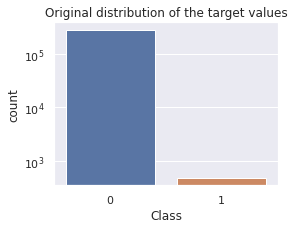

In [ ]:
plt.figure(figsize=(4,3))
ax=sns.countplot(x="Class", data=data)
ax.set_title('Original distribution of the target values')
ax.set_yscale("log")

Text(0.5, 1.0, 'Distribution of the target values after running SMOTE')

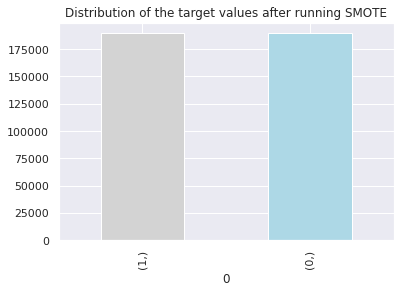

In [ ]:
ax=pd.DataFrame(y_train_new).value_counts().sort_values().plot(kind = 'bar', color = ['lightgrey', 'lightblue'])
ax.set_title("Distribution of the target values after running SMOTE")

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test=train_test_split(X_train_new, y_train_new, test_size=.20, random_state=5)

from sklearn.ensemble import RandomForestClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

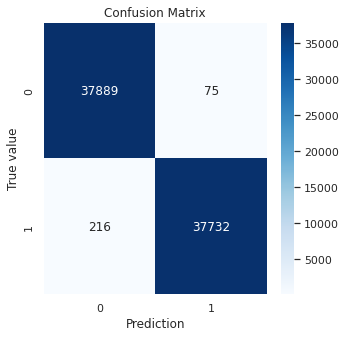

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, xgb_yhat))
cm=confusion_matrix(y_test, xgb_yhat)

In [ ]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision: {:.2%}'.format(Precision))
print('Recall: {:.2%}'.format(Recall))

Precision: 99.80%
Recall: 99.43%


In [ ]:
from sklearn.preprocessing import binarize

for i in range(0,11):
  y_pred_prob_yes=xgb.predict_proba(X_test)
  y_pred2=binarize(y_pred_prob_yes, threshold=i/10)[:,1]
  cm2=confusion_matrix(y_test, y_pred2)
  print('With', i/10, 'threshold the Confusion Matrix is ', '\n', cm2, '\n', 
        'with', cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0], 'Type II errors( False Negatives)','\n\n',
        'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 'Specificity: ', cm2[1,1]/(float(cm2[1,1]+cm2[0,1])), '\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[    0 37964]
 [    0 37948]] 
 with 37948 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.4998946148171567 



With 0.1 threshold the Confusion Matrix is  
 [[36825  1139]
 [    0 37948]] 
 with 74773 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.9708598766853429 



With 0.2 threshold the Confusion Matrix is  
 [[37521   443]
 [    0 37948]] 
 with 75469 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.9884608371753797 



With 0.3 threshold the Confusion Matrix is  
 [[37738   226]
 [   10 37938]] 
 with 75676 correct predictions and 10 Type II errors( False Negatives) 

 Sensitivity:  0.9997364815010014 Specificity:  0.9940781888690913 



With 0.4 threshold the Confusion Matrix is  
 [[37827   137]
 [   79 37869]] 
 with 75696 correct predictions and 79 Type II errors( False Negatives) 

 Sen

0.4 is the best threshold value in case of Smote </br>
PRECISION (specificity) with SMOTE and XGBOOST + threshold tuning: 99,64%</br>
RECALL (sensitivity) with SMOTE and XGBOOST + threshold tuning: 99.79%

Using SMOTEENN</br>
Similar to SMOTETomek, first SMOTE is applied to create synthetic data points of minority class samples, then using ENN (Edited Nearest Neighbour is an undersampling technique) the data points on the border or boundary are removed to increase the separation of the two classes.


In [ ]:
from imblearn.combine import SMOTEENN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)
smt = SMOTEENN(random_state=42)
X_train_new, y_train_new = smt.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Distribution of the target values after running SMOTEENN')

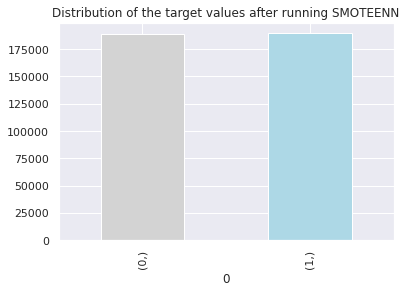

In [ ]:
ax=pd.DataFrame(y_train_new).value_counts().sort_values().plot(kind = 'bar', color = ['lightgrey', 'lightblue'])
ax.set_title("Distribution of the target values after running SMOTEENN")

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test=train_test_split(X_train_new, y_train_new, test_size=.20, random_state=5)

from sklearn.ensemble import RandomForestClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

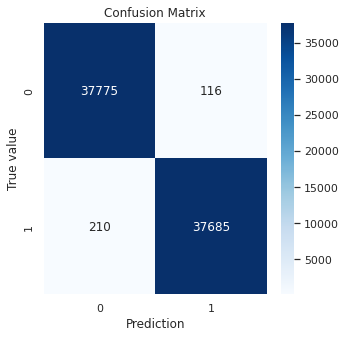

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, xgb_yhat))
cm=confusion_matrix(y_test, xgb_yhat)

In [ ]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision with XGBOOST and SMOTEENN: {:.2%}'.format(Precision))
print('Recall with XGBOOST and SMOTEENN: {:.2%}'.format(Recall))

Precision with XGBOOST and SMOTEENN: 99.69%
Recall with XGBOOST and SMOTEENN: 99.45%


In [ ]:
from sklearn.preprocessing import binarize

for i in range(0,11):
  y_pred_prob_yes=xgb.predict_proba(X_test)
  y_pred2=binarize(y_pred_prob_yes, threshold=i/10)[:,1]
  cm2=confusion_matrix(y_test, y_pred2)
  print('With', i/10, 'threshold the Confusion Matrix is ', '\n', cm2, '\n', 
        'with', cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0], 'Type II errors( False Negatives)','\n\n',
        'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 'Specificity: ', cm2[1,1]/(float(cm2[1,1]+cm2[0,1])), '\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[    0 37891]
 [    0 37895]] 
 with 37895 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.5000263900984351 



With 0.1 threshold the Confusion Matrix is  
 [[36754  1137]
 [    1 37894]] 
 with 74648 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.999973611294366 Specificity:  0.9708693090107863 



With 0.2 threshold the Confusion Matrix is  
 [[37428   463]
 [    2 37893]] 
 with 75321 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.999947222588732 Specificity:  0.9879288768380436 



With 0.3 threshold the Confusion Matrix is  
 [[37640   251]
 [   19 37876]] 
 with 75516 correct predictions and 19 Type II errors( False Negatives) 

 Sensitivity:  0.9994986145929542 Specificity:  0.9934167387940305 



With 0.4 threshold the Confusion Matrix is  
 [[37736   155]
 [   87 37808]] 
 with 75544 correct predictions and 87 Type II err

0.5 is the best split

NEURAL NETWORK for inbalanced dataset with using class weight

In [ ]:
counter0=0
counter1=0
for i in y_train:
  if (i[0])==0:
    counter0+=1
  if (i[0])==1:
    counter1+=1

print(counter0/counter1)

598.6719242902208


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model=keras.Sequential([
    keras.layers.Dense(26, input_dim=29, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

  if weights==-1:
    model.fit(X_train, y_train, epochs=10)
  else:
    model.fit(X_train, y_train, epochs=10, class_weight=weights)   #, class_weight = {0:1 , 1:598})

  print(model.evaluate(X_test, y_test))
  y_preds=model.predict(X_test)
  Y_preds=np.round(y_preds)

  print("Classifiation Report_ \n", classification_report(y_test, Y_preds))

  return y_preds

y_preds=ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0255 - accuracy: 0.9969
Epoch 2/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0090 - accuracy: 0.9992
Epoch 3/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0055 - accuracy: 0.9992
Epoch 4/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 5/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0047 - accuracy: 0.9994
Epoch 6/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 7/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 8/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0034 - accuracy: 0.9995
Epoch 9/10
5941/5941 [==============================] - 12s 2ms/step - loss: 0.0039 - accuracy: 0.9995
Epoch 10/10
2926/2926 [==============================] - 4s 1ms/step - lo

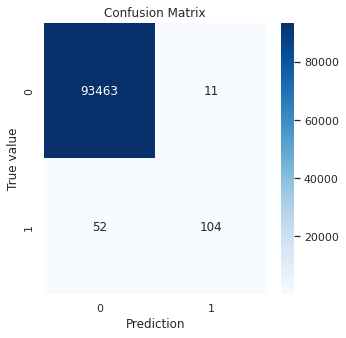

In [ ]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, np.round(y_preds)))
cm=confusion_matrix(y_test, np.round(y_preds))

In [ ]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision with neural network and weighted class: {:.2%}'.format(Precision))
print('Recall with neural network and weighted class: {:.2%}'.format(Recall))

Precision with neural network and weighted class: 90.43%
Recall with neural network and weighted class: 66.67%


NN with simple UNDERSAMPLING

In this case I just reduce the valuable majority data in favour of the minority data, so in real life predictions it can cause inaccuracies and poor performance on the test set.

In [ ]:
class0=data[data.Class==0]
class1=data[data.Class==1]

In [ ]:
class0.shape

(283253, 30)

In [ ]:
class1.shape

(473, 30)

In [ ]:
class0_unders=class0.sample(473)

In [ ]:
data_under=pd.concat([class0_unders, class1], axis=0)
data_under.Class.value_counts()

X=data_under.drop('Class', axis='columns')
Y=data_under['Class']

X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=.20, random_state=15, stratify=Y)


In [ ]:
y_preds=ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
24/24 [==============================] - 1s 2ms/step - loss: 1.0051 - accuracy: 0.6124
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7672
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.8228
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8585
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8915
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.9061
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8981
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.9153
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9286
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9316
[0.23459146916866302,

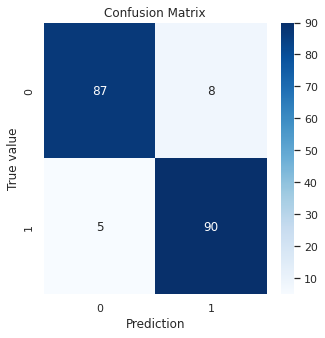

In [ ]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, np.round(y_preds)))
cm=confusion_matrix(y_test, np.round(y_preds))

In [ ]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision with neural network and undersampling: {:.2%}'.format(Precision))
print('Recall with neural network and undersampling: {:.2%}'.format(Recall))

Precision with neural network and undersampling: 91.84%
Recall with neural network and undersampling: 94.74%


NN with simple OVERSAMPLING

In this case I am just copy-pasting the minority data, so in real life predictions it can cause inaccuracies, as we have a huge dataset

In [ ]:
class0=data[data.Class==0]
class1=data[data.Class==1]
print(class0.shape, class1.shape)

(283253, 30) (473, 30)


In [ ]:
class1_over=class1.sample(283253, replace=True)

In [ ]:
data_over=pd.concat([class0, class1_over], axis=0)


X=data_over.drop('Class', axis='columns')
Y=data_over['Class']

X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=.20, random_state=15, stratify=Y)

y_preds=ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
14163/14163 [==============================] - 30s 2ms/step - loss: 0.1154 - accuracy: 0.9669
Epoch 2/10
14163/14163 [==============================] - 30s 2ms/step - loss: 0.0380 - accuracy: 0.9883
Epoch 3/10
14163/14163 [==============================] - 30s 2ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 4/10
14163/14163 [==============================] - 30s 2ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 5/10
14163/14163 [==============================] - 30s 2ms/step - loss: 0.0168 - accuracy: 0.9951
Epoch 6/10
14163/14163 [==============================] - 30s 2ms/step - loss: 0.0139 - accuracy: 0.9960
Epoch 7/10
14163/14163 [==============================] - 30s 2ms/step - loss: 0.0131 - accuracy: 0.9962
Epoch 8/10
14163/14163 [==============================] - 29s 2ms/step - loss: 0.0119 - accuracy: 0.9966
Epoch 9/10
14163/14163 [==============================] - 30s 2ms/step - loss: 0.0120 - accuracy: 0.9966
Epoch 10/10
3541/3541 [==============================] 

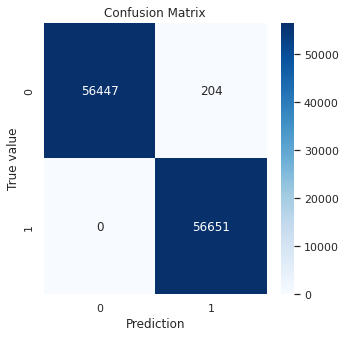

In [ ]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, np.round(y_preds)))
cm=confusion_matrix(y_test, np.round(y_preds))

In [ ]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision with neural network and oversampling: {:.2%}'.format(Precision))
print('Recall with neural network and oversampling: {:.2%}'.format(Recall))

Precision with neural network and oversampling: 99.64%
Recall with neural network and oversampling: 100.00%


In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

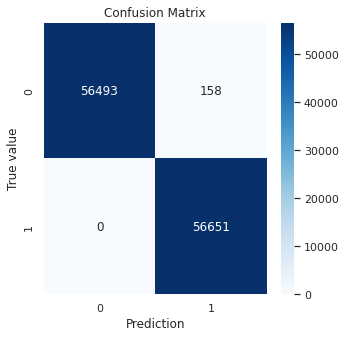

In [ ]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

plot_confusion(confusion_matrix(y_test, xgb_yhat))
cm=confusion_matrix(y_test, xgb_yhat)

In [ ]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
Precision=TP/(TP+FP)   # Specificity
Recall=TP/(TP+FN)   # or Sensitivity
#This model is more specific then Sensitive
print('Precision with xgboost and oversampling: {:.2%}'.format(Precision))
print('Recall with xgboost and oversampling: {:.2%}'.format(Recall))

Precision with xgboost and oversampling: 99.72%
Recall with xgboost and oversampling: 100.00%
